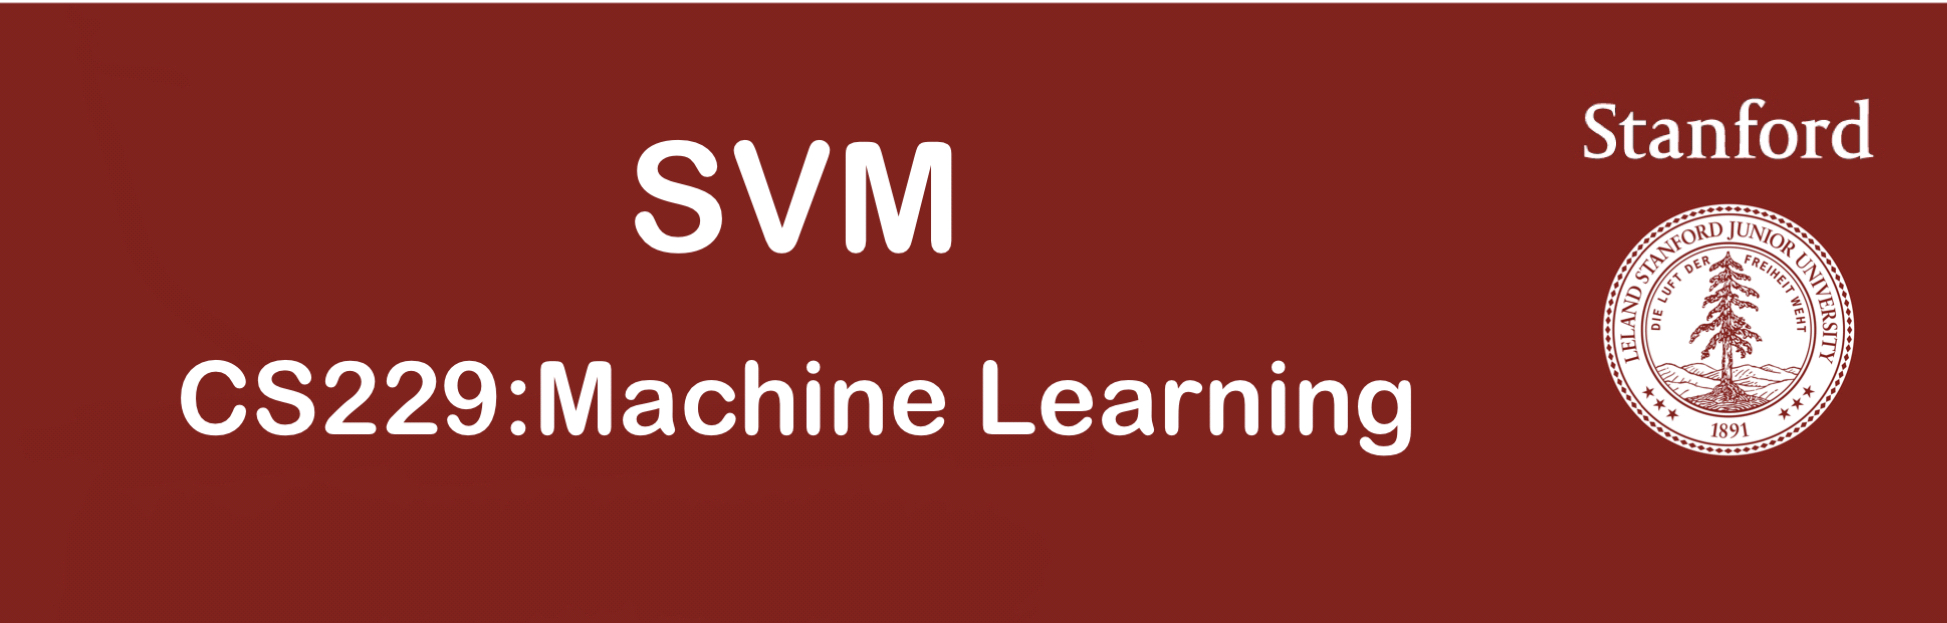

## 1.间隔：直观描述(Margins:Intuition)

首先介绍函数间隔和几何间隔，由它们引出最优间隔分类器；为了多快好地解决最优间隔分类器问题(Optimal Margin Classfier)，使用了拉格朗日对偶性(Lagrange duality)性质，先要理解原始优化问题与对偶问题(Primal/Dual Problem)，以及它们在什么条件下最优解等价，然后写出最优间隔分类器的对偶形式；通过对最优间隔分类器对偶问题的求解，发现求解时目标函数存在内积形式的计算，据此引入了核技法，引入核技法后就得到了完完全全的 SVM 求解问题，使用序列最小化算法（SMO）进行求解。

对于逻辑回归来说，概率 $p(y=1|x;\theta)$ 由函数 $h_{\theta}(x)=g(\theta^T x)$ 给出，预测结果味：

$$\text{predict} "1" \text{iff} \quad \theta^T x \leq 0,$$

$$\text{predict} "0" \text{iff} \quad \theta^T x < 0,$$

其中 $\text{iff}$ 表示当且仅当。对于一个正训练样本 $(y=1)$ 来说，如果 $\theta^T x$越大，则 $h_{\theta}(x)=p(y=1|x;w,b)$ 越接近1，因此我们可以非常“确信”该样本的标签为 1，以此类推，我们有：

$$\text{If} \quad \theta^T x \gg 0, \text{very "confident" that} \quad y = 1,$$

$$\text{If} \quad \theta^T x \ll 0, \text{very "confident" that} \quad y = 0,$$

给定一个训练集，如果我们可以找到这样的 $\theta$，满足上面的条件，那么对所有的训练样本来说，分类的置信度将很高，这看起来是一个不错的目标。之后我们将用 **「函数间隔(functional margins)」** 来对这一描述进行定义。

接下来我们将换一个角度来描述间隔。观察下面这幅图（以二维输入为例），x 代表正训练样本，o 代表负训练样本，决策边界由 $\theta^T x = 0$ 给出（又被称为 **「分离超平面(separating hyperplane)」**），有三个点以 A, B 和 C 标注。

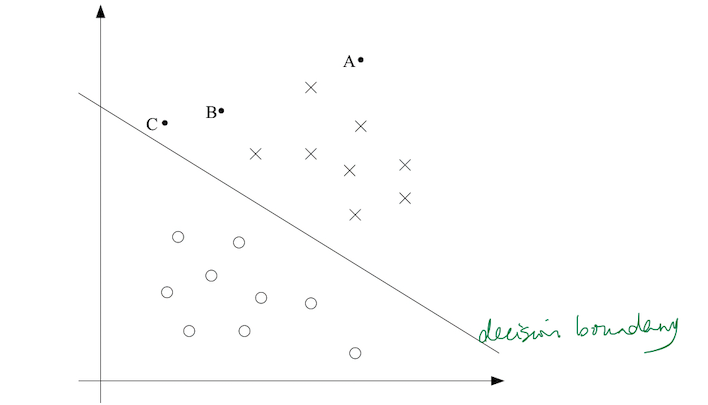

可以看到，点 A 距离决策边界很远，因此如果要进行预测，我们非常“确信”其标签为 1。而对于点 C ，由于其离决策边界太近，所以我们不能非常确定其标签为 1 ，只要决策边界发生一点点变化，就可能导致对 C 的预测结果发生改变。而 B 的预测置信度介于 A 和 C 之间。

因此，给定一个训练集，我们希望能找到一条决策边界，使我们对所有训练样本的预测是正确且置信度高的，即要求所有样本都远离决策边界。之后我们将用 **「几何间隔(geometric margins)」** 来对这一描述进行定义。

## 2.Notation

为了更好地说明 SVM，我们将修改一些之前定义过的符号：

* 在逻辑回归中，我们使用 0,1 来表示两个类，现在将改用 -1,+1 ，即 $y \in \{-1, +1\}$；

* 在逻辑回归中，我们使用向量 $\theta$ 作为参数，现在我们将使用参数 $w$ 和 $b$，即 $h_{w,b}(x)=g(w^T x+b)$，其中 $w$ 相当于 $[\theta_1, \theta_2,...,\theta_n]^T$，$b$ 相当于 $\theta_0$；

* 在逻辑回归中，我们的 $g$ 是 sigmoid 函数，现在改为：

$$g(z)=\begin{cases}
1,& z \leq 0\\
-1,& \text{otherwise}
\end{cases}$$

注意：现在我们的分类器会直接预测 1 或 -1（类似感知器算法），而不是先输出中间态：$y$ 为 1 的概率。

## 3. Functional and geometric margins

给定一个训练样本 $(x^{(i)},y^{(i)})$，我们定义它到超平面 $(w,b)$ 的 **「函数间隔」** 为：

$$\hat{\gamma}^{(xi)}=y^{(i)}(w^T x^{(i)}+b)$$

为了使预测的置信度更高，我们希望函数间隔越大越好，即：

$$\text{if} \quad y^{(i)}=1, \text{want} \quad w^Tx^{(i)}+b \gg 0$$

$$\text{if} \quad y^{(i)}=-1, \text{want} \quad w^Tx^{(i)}+b \ll 0$$

易知，如果 $y^{(i)}(w^T x^{(i)}+b)>0$，则表示对该样本的预测正确。

然而，对于一个给定输出为 $g$ （取值为 $\{-1, 1 \}$）的线性分类器，函数间隔的性质导致其对于预测置信度的测量并不可信。这个性质就是我们可以在不改变超平面的情况下，通过成比例地增加 $w,b$，使得函数间隔任意大。这样预测的结果就仅与符号相关，而不取决于大小，从而失去了对置信度的测量。为了解决这个问题，我们需要对 $g$ 进行归一化（即几何间隔）。

给定一个训练集 $S=\{(x^{(i)},y^{(i)});i=1,...,m\}$，我们定义 $S$ 超平面 $(w,b)$ 的「函数间隔」为所有训练样本的函数间隔中的最小值，即：

$$\hat{\gamma}=\underset{i=1,...,m}{\text{min}} \hat{\gamma}^{(i)}$$

接下来，让我们讨论 **「几何间隔」**。观察下面的图片（每个坐标轴表示一维变量）：

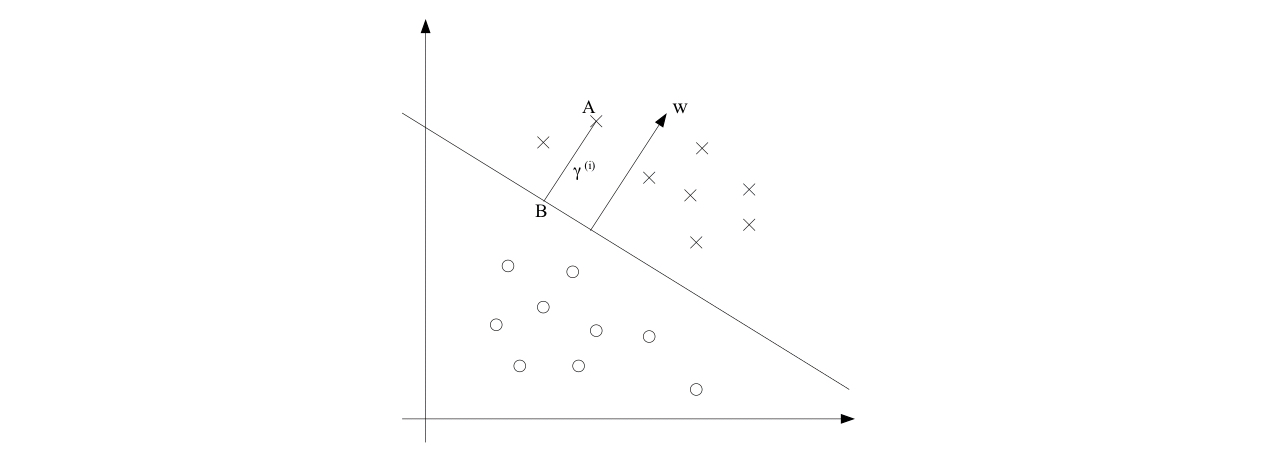

对于超平面 $$w^T x+b=0$$，其法向量 $w$，点 $A$ 表示某个输入为 $x^{(i)}$ 的训练样本，标签为 $y^{(i)}=1$，其到决策边界的距离为 $\gamma^{(i)}$，即线段 $AB$ 的长度。

现在，我们需要求解出 $\gamma^{(i)}$ 的值。由于 $BA$ 方向即为法向量，其单位向量为 $\frac{w}{\parallel w \parallel}$，因此点 $B$ 可以通过下式计算：

$$x^{(i)}-\gamma^{(i)}\cdot \frac{w}{\parallel w \parallel}$$

而点 $B$ 又位于决策边界上，即满足 $w^T x+b=0$，因此有：

$$w^T (x^{(i)}-\gamma^{(i)}\cdot \frac{w}{\parallel w \parallel})+b=0$$

解得：

$$\gamma^{(i)}=\frac{w^T x^{(i)}+b}{\parallel w \parallel}=(\frac{w}{\parallel w \parallel})^T x^{(i)}+\frac{b}{\parallel w \parallel}$$

这是基于正训练样本得出的结果，一般来说，对于一个训练样本 $(x^{(i)},y^{(i)})$，其到超平面 $(w,b)$ 的 **「几何间隔」** 为：

$$\gamma^{(i)}=y^{(i)}((\frac{w}{\parallel w \parallel})^T x^{(i)}+\frac{b}{\parallel w \parallel})$$

可以发现当 $\parallel w \parallel = 1$ 时，几何间隔即为函数间隔。此外，对于几何间隔来说，等比例地改变参数，几何间隔不会发生任何改变，因为 $\parallel w \parallel = 1$ 也会随之变化。这个性质可以让我们任意地改变参数的值，而不对决策边界造成实质性的影响（方便进行数学上的变换）。

最后给定一个训练集 $S=\{(x^{(i)},y^{(i)});i=1,...,m\}$，与之前类似，我们定义 $S$ 超平面 $(w,b)$ 的 **「几何间隔」** 为所有训练样本的函数间隔中的最小值，即：

$$\gamma=\underset{i=1,...,m}{\text{min}}{\gamma}^{(i)}$$

## 4 最优间隔分类器(The optimal margin classifier)

给定一个训练集，我们希望能找到一个超平面，使正样本与负样本之间的“间距”（几何距离）尽量大，这样预测的可信度会更高。

需要再次强调的是，我们假设训练集是线性可分的，即能够使用超平面将正样本和负样本分割开来。那么如何找到具有最大几何间隔的超平面呢？我们可以将其描述为如下的优化问题：

$$\underset{\gamma,w,b}{\text{max}}\gamma$$

$$\text{s.t.} \quad y^{(i)}(w^T x^{(i)}+b) \geq \gamma,i=1,2,...,m$$

$$\parallel w \parallel=1$$

其中，$\parallel w \parallel =1$ 保证了函数间隔与几何间隔相同。该优化问题的含义是通过改变 $w,b$，在保证训练集中的所有点到超平面的几何距离都大于 $\gamma$ 的情况下，寻找一个最大的 $\gamma$ 值，即找到训练集到超平面几何距离的最大值。

但是，上述问题不易求解，因为约束条件 $\parallel w \parallel=1$ 是非凸性约束，最优解容易达到局部最优，且其形式不能使用标准优化软件进行求解，所以，我们对该问题进行转换，得到：

$$\underset{\gamma,w,b}{\text{max}}\frac{\hat{\gamma}}{\parallel w \parallel=1}$$

$$\text{s.t.} \quad y^{(i)}(w^T x^{(i)}+b) \geq \hat{\gamma},i=1,2,...,m$$

现在，我们需要在保证训练集中的所有点到超平面的函数距离都大于 $\hat{\gamma}$ 的情况下， 最大化 $\underset{\gamma,w,b}{\text{max}}\frac{\hat{\gamma}}{\parallel w \parallel=1}$。因为几何间隔与函数间隔之间的关系为 $\gamma=\hat{\gamma}/\parallel w \parallel$，所以该优化问题与之前的等价，我们可以将 $w$ 和 $b$ 成比例缩放，使得 ${\parallel w \parallel=1}$，来得到之前的优化问题。虽然非凸性约束已经去除，但是目标函数  $\hat{\gamma}/\parallel w \parallel$ 是非凸的，我们仍然无法直接使用软件进行求解。

我们需要继续修改优化问题的形式，之前我们曾提到，通过成比例地改变 $w,b$，可以使得函数间隔变成任意的大小，而不改变超平面本身。因此，对于上述约束条件，我们可以通过缩放 $w,b$，使得：

$$\hat{\gamma}=1$$

这样，我们的目标函数就变为 $\frac{1}{\parallel w \parallel}$，因为最大化 $\frac{1}{\parallel w \parallel}$ 等价于最小化 ${\parallel w \parallel}^2$，所以我们得到了如下的优化问题：

$$\underset{\gamma,w,b}{\text{min}}\frac{1}{2}{\parallel w \parallel}^2$$

$$\text{s.t.} \quad y^{(i)}(w^T x^{(i)}+b) \geq 1,i=1,2,...,m$$

这样我们的问题就转化成了在线性约束下的二次规划问题，可以使用专业软件来求解这个优化问题，从而得到 **「最优间隔分类器」**。

下面，我们要讨论一下拉格朗日对偶，其可以帮助我们推导出上述优化问题的对偶形式，从而更快地进行求解，同时还能够引出核函数，实现在超高维度空间中的求解。

### 5. 拉格朗日对偶性(Lagarange duality)

对于如下形式的优化问题：

$$\underset{w}{\text{min}} \quad f(w)$$

$$\text{s.t.} \quad h_i(w)=0,i=1,2,...,l$$

我们可以构造 **「拉格朗日方程(Lagrangian)」**：

$$\mathcal{L}(w, \beta)=f(w)+\sum_{i=1}^l \beta_i h_i(w)$$

其中，$\beta_i$ 是 **「拉格朗日乘子(Lagrange multipliers)」**。我们对拉格朗日方程求偏导数，将偏导数设为 0，求得的值就是原问题的解：

$$\frac{\partial \mathcal{L}}{\partial w_i}=0;\frac{\partial \mathcal{L}}{\partial \beta_i}=0$$

下面我们将通过添加不等式约束条件，介绍更为广义的拉格朗日方程。在约束条件中添加不等式约束后，我们得到如下问题，称之为 **「原始(primal)」** 优化问题：

$$\underset{w}{\text{min}} \quad f(w)$$

$$\text{s.t.} \quad g_i(w) \leq 0,i=1,2,...k$$

$$ h_i(w)=0,i=1,2,...,l$$

该问题对应的 **「广义拉格朗日方程(generalized Lagrangian)」** 是：

$$\mathcal{L}(w, \alpha,\beta)=f(w)+\sum_{i=1}^k \alpha_i g_i(w) + \sum_{i=1}^l \beta_i h_i(w)$$

其中，$\alpha_i$ 和 $\beta_i$ 是拉格朗日乘子。现在我们定义：

$$\theta_{\mathcal{P}}(w)=\underset{\alpha,\beta;\alpha_i>0}{\text{max}}L(w,\alpha,\beta)$$

其中，下标 “$\mathcal{P}$” 代表原始。可以发现，在给定 $w$ 时，如果 $w$ 不满足所有约束条件，比如 $g_i(w)>0$ 或 $h_i(w) \neq 0$ ，那么总可以找到相应的 $\alpha,\beta$，使得：

$$\theta_{\mathcal{P}}(w)=\underset{\alpha,\beta;\alpha_i>0}{\text{max}}f(x)+\sum_{i=1}^k \alpha_i g_i(w)+\sum_{i=1}^l \beta_i h_i(w)=\infty$$

而当约束满足时，$\theta_{\mathcal{P}}(w)=f(w)$，因此我们有：

$$\theta_{\mathcal{P}}=\begin{cases}
f(w),& w \text{满足原始问题的约束}\\
\infty,& \text{其他}
\end{cases}$$

因此，如果考虑最小化：

$$\underset{w}{\text{min}}\theta_{\mathcal{p}}(w)=\underset{w}{\text{min}}\underset{\alpha,\beta;\alpha_i>0}{\text{max}}\mathcal{L}(w,\alpha,\beta)$$

那么它与原始优化问题是等价的，即有相同的解。这样一来我们就把原始优化问题表示成了**广义拉格朗日函数的极小极大问题**。为了后面使用方便，我们定义原始问题取得最优解时的函数值：

$$p^{*}=\underset{w}{\text{min}}\theta_{\mathcal{P}}(w)$$

称为 **「原始问题的值」**。

现在，我们来看一下另外一个问题：

$$\theta_{\mathcal{D}}(\alpha, \beta)=\underset{w}{\text{min}}\mathcal{L}(w,\alpha, \beta)$$

其中，下标 “$\mathcal{D}$” 代表对偶。注意在 $\theta_{\mathcal{P}}$ 的定义中我们是最大化关于 $\alpha,\beta$ 的函数，而这里我们是最小化关于 $w$ 的函数。

现在我们可以提出 **「对偶」优化问题** ：

$$\underset{\alpha,\beta;\alpha_i \leq 0}{\text{max}}\theta_{\mathcal{D}}(\alpha, \beta)=\underset{\alpha,\beta;\alpha_i \geq 0}{\text{max}}\underset{w}{\text{min}}\mathcal{L}(w,\alpha, \beta)$$

其与原始问题基本相同，唯一的区别就在于 $\text{min}$ 和 $\text{max}$ 的顺序不同。类似地，我们定义：

$$d^*=\underset{\alpha,\beta;\alpha_i \leq 0}{\text{max}}\theta_{\mathcal{D}}(\alpha,\beta)$$

称为 **「对偶问题的值」** 。

那么原始问题和对偶问题有什么关联呢？易证明对于任意函数，都有 $\text{min}\text{max} \leq \text{max}\text{min}$，所以我们可以得到：

$$d^*=\underset{\alpha,\beta;\alpha_i \geq 0}{\text{max}}\underset{w}{\text{min}}\mathcal{L}(w,\alpha, \beta) \leq \underset{w}{\text{min}}\underset{\alpha,\beta;\alpha_i \geq 0}{\text{max}}\mathcal{L}(w,\alpha,\beta)=p^*$$

而在某些条件下，我们将有：

$$d^*=p^*$$

这样我们就可以通过求解对偶问题来得到原始问题的解。

这些条件是：

* $f$ 和 $g_i$ 是凸函数（Hessian矩阵半正定）

* $h_i$ 是仿射函数（允许截距存在的线性函数）

* 不等式约束 $g_i$ 是严格可执行的（Slater条件），即存在 $w$ 使得对于所有的 $i$ 都有 $g_i(w)<0$

在上述条件成立的情况下，**「一定存在」** $w^*,\alpha^*,\beta^*$，使得 $w^*$ 是原始问题的解，$\alpha^*,\beta^*$ 是对偶问题的解，并且有 $p^*=d^*=\mathcal{L}(w^*,\alpha^*,\beta^*)$，同时 $w^*,\alpha^*,\beta^*$ 需要满足 「**KKT 条件 (Karush-Kuhn-Tucker conditions)」**：

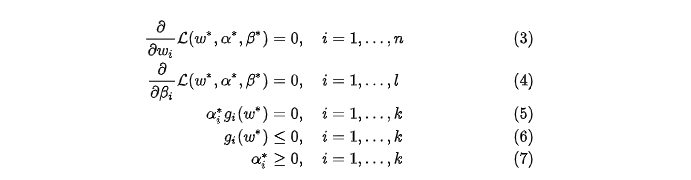

因此，如果存在满足 KKT 条件的 $w^*,\alpha^*,\beta^*$，那么它一定是原始问题和对偶问题的解。注意：单独的 KKT 条件只是强对偶的必要条件，只有当满足之前的假设时，KKT 条件才是强对偶的充要条件。

对于 (5) 式，我们称之为 **「KKT 对偶互补条件」**。这个条件表明如果 $\alpha^* > 0$ ，那么就有 $g_i(w^*)=0$，即该约束被激活（达到临界条件）这个条件将展示出在 SVM 中，只有一些支持向量点会起作用，在之后的 SMO 算法的收敛验证中也会用到这个条件。

### 6. 最优间隔分类器的求解

之前，我们给出了如下的求解最优间隔分类器的（原始）优化问题：

$$\underset{\gamma,w,b}{\text{min}}\frac{1}{2}{\parallel w \parallel}^2$$

$$\text{s.t.} \quad y^{(i)}(w^T x^{(i)}+b) \geq 1,i=1,2,...,m$$

我们可以将约束表示为：

$$g_i(w)=-y^{(i)}(w^T x^{(i)}+b)+1 \leq 0$$

注意到：从 KKT 对偶互补条件可以得出，只有当函数间隔等于 1 时，才有 $\alpha_i > 0$，而函数间隔等于 1 对应着距离分隔超平面最近的点，即下图中虚线穿过的三个点：

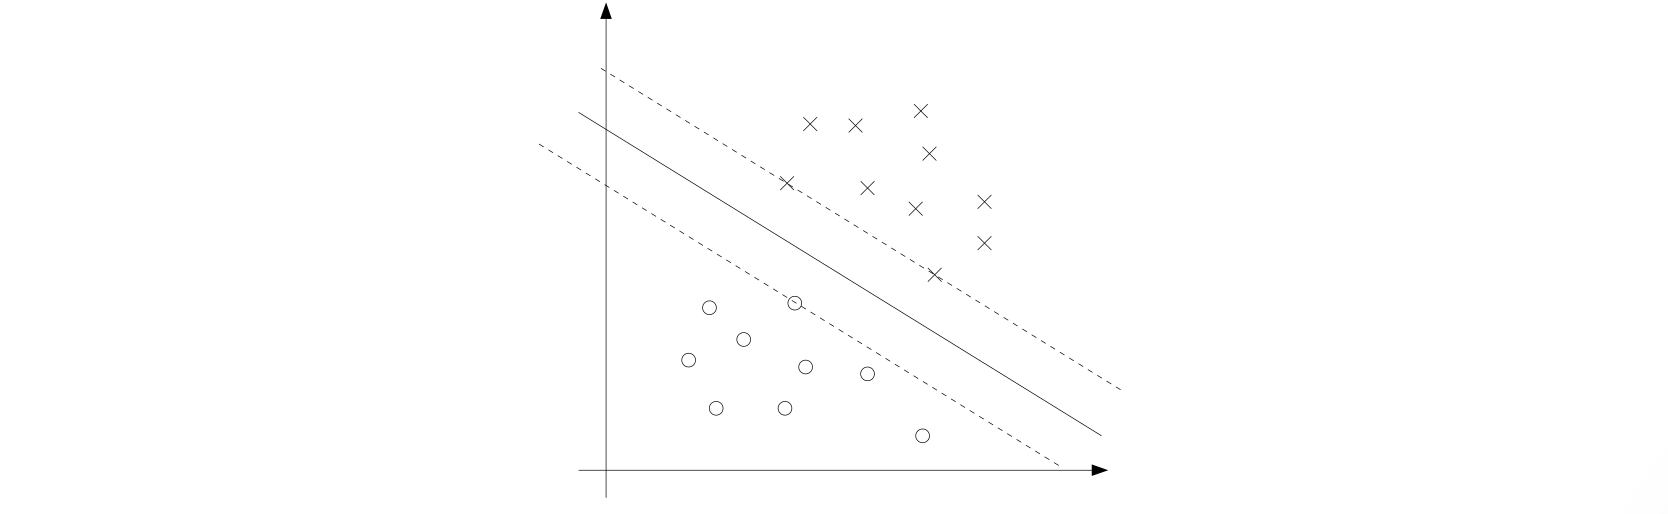

只有这三个点对应的 $\alpha_i$ 在优化问题的解中不为 0，这些点也被称为 **「支持向量」**，其数量远小于训练集。

在接下来的推导中，一个关键思路是：我们将尝试把算法表示为仅包含输入空间中的点的内积的形式 $\langle x^{(i)},x^{(j)}\rangle$（可以理解为 $(x^{(i)})^T x^{(j)}$），当使用核技巧的时候，这将十分重要。

让我们构建该优化问题的拉格朗日方程：

$$\mathcal{L}(w,b,\alpha)=\frac{1}{2}{\parallel w \parallel}^2-\sum_{i=1}^m\alpha_i[y^{(i)}(w^T x^{(i)}+b)-1]\tag{8}$$

注意：这里只有不等式约束，没有等式约束，所以拉格朗日乘子只有 $\alpha$，没有 $\beta$。

该问题的对偶形式如下：

$$d^*=\underset{\alpha:\alpha_i \geq 0}{\text{max}}\theta_{\mathcal{D}}(\alpha)=\underset{\alpha:\alpha_i \geq 0}{\text{max}}\underset{w,b}{\text{min}}\mathcal{L}(w,b,\alpha)$$

首先，求 $\mathcal{L}(w,b,\alpha)$ 关于 $w,b$ 的最小值，令偏导为 0：

$$\frac{\partial{\mathcal{L}}}{\partial w} = w- \sum_{i=1}^m \alpha_i y^{(i)} x^{(i)}=0 ,$$

$$\frac{\partial{\mathcal{L}}}{\partial b} = 0- \sum_{i=1}^m \alpha_i y^{(i)}=0 $$

可得：

$$w=\sum_{i=1}^m \alpha_i y^{(i)} x^{(i)}\tag{9}$$

$$\sum_{i=1}^m \alpha_i y^{(i)}=0\tag{10}$$

将以上结果代入拉格朗日方程，得到：

$$\underset{w,b}{\text{min}}\mathcal{L}(w,b,\alpha)=\sum_{i=1}^m \alpha_i-\frac{1}{2} \sum_{i,j=1}^m y^{(i)}y^{(j)}\alpha_i \alpha_j(x^{(i)})^T x^{(j)}$$

$$\qquad \qquad \qquad=\sum_{i=1}^m \alpha_i-\frac{1}{2} \sum_{i,j=1}^m y^{(i)}y^{(j)}\alpha_i \alpha_j \langle x^{(i)},x^{(j)}\rangle$$

于是，我们可以得到如下的对偶优化问题：

$$\underset{\alpha}{\text{max}} W(\alpha)=\sum_{i=1}^m \alpha_i-\frac{1}{2} \sum_{i,j=1}^m y^{(i)}y^{(j)}\alpha_i \alpha_j \langle x^{(i)},x^{(j)}\rangle$$

$$\text{s.t.} \quad \alpha \geq 0,i=1,2,...,m$$

$$\sum_{i=1}^m \alpha_i y^{(i)}=0$$

可以证明该优化问题满足 $p^*=d^*$ 的前提条件与 KKT 条件，因此，我们可以通过求解对偶问题的解得到原始问题的解，求得 $\alpha$ 之后，我们可以通过下面的公式求出 $w,b$ ：

$$w^*=\sum_{i=1}^m \alpha_i^* y^{(i)}x^{(i)}$$

$$b^*=-\frac{\underset{i;y^{(i)}=-1}{\text{max}}{w^*}^T x^{(i)}+\underset{i;y^{(i)}=1}{\text{min}}{w^*}^T x^{(i)}}{2}\tag{11}$$

式 (11) 的计算利用了超平面到正负样本两侧的距离相等。当求出所有的参数后，我们就可以通过计算 $w^T x+b$ 来进行分类了，当其大于 0 时预测 $y=1$，公式如下：

$$w^T x+b=(\sum_{i=1}^m \alpha_i y^{(i)} x^{(i)})^T x+b\tag{12}$$

$$\qquad \qquad=\sum_{i=1}^m \alpha_i y^{(i)} \langle x^{(i)},x \rangle +b \tag{13}$$

通过上式我们发现，现在新来一个数据，我们只需要计算它与训练样本的内积即可。并且通过前面的 KKT 对偶互补条件我们知道，只有除了支持向量的那些样本，都有 $\alpha_i=0$，所以，我们只需要将新样本与支持向量进行内积即可进行预测。

通过求解优化问题的对偶形式，我们对要解决的问题的结构有了更为深入的理解，并且还根据输入特征向量之间的内积来表示整个算法。在下一节中，我们将充分利用这些内容，对我们的分类问题使用 **「核方法」**。最终得到的算法，就是 **「支持向量机」**，其将能够在非常高的维度空间中进行有

### 7. 核(Kernels)

在之前的线性回归模型中，我们探讨了使用多项式回归来解决房价预测问题：给定输入 $x$ 为房屋面积，考虑使用 $x,x^2,x^3$ 作为特征来进行回归。这里给出如下定义：将原始的输入值称为 **「属性(attributes)」**，在房价预测问题中即为 $x$ ，将其映射到的新的输入数据集称为 **「特征(features)」**，在房价预测问题中即为 $x,x^2,x^3$ 。我们使用 $\phi$ 来表示这种将属性映射为特征的 **「特征映射(feature mapping)」**，对于房价预测问题：

$$\phi(x)=\begin{bmatrix}
   x \\
   x^2 \\
   x^3
  \end{bmatrix}$$

在 SVM 中，我们希望使用某些特征 $\phi(x)$ 来替代原始的输入属性 $x$ 来进行学习。为了做到这一点，我们只需要简单地在原来的算法中将所有的 $x$ 替换为 $\phi(x)$ 就行了

而我们知道，SVM 可以表示为内积 $\langle x,z \rangle$ 的形式，这代表我们可以将所有的内积替换为 $\langle \phi(x),\phi(z) \rangle$ 。特别地，给定一个特征映射 $\phi$，我们可以定义相应的 **「核(Kernel)」** :

$$K(x,z)=\phi(x)^T \phi(z)$$

这样对于算法中所有的内积 $\langle x,z \rangle$，我们可以使用 $K(x,z)$ 进行替换。

现在，给定一个映射 $\phi$，我们可以通过找出 $\phi(x)$ 和 $\phi(z)$ 并计算其内积来得出 $K(x,z)$。然而有趣的是，直接计算 $K(x,z)$ 的代价有时会比较低，即便 $\phi(x)$ 本身可能是一个非常高维的向量，计算起来代价较高。在这种情况下，我们可以在 $\phi$ 给出的高维特征空间中执行 SVM 算法（解决低维空间中线性不可分的情况），并且不用去计算 $\phi(x)$ 的具体值。

让我们看一个例子。假设 $x,z \in \mathbb{R}^n$，对于下面的核：

$$K(x,z)=(x^T z)^2$$

我们可以将其改写为：

$$K(x,z)=(\sum_{i=1}^n x_i z_i)(\sum_{i=1}^n x_i z_i)=\sum_{i=1}^n\sum_{j=1}^n x_i x_j z_i z_j=\sum_{i,j=1}^n(x_i x_j)(z_i,z_j)$$

这样我们就有 $K(x,z)=\phi(x)^T \phi(z)$，其中特征映射 $\phi$ 如下所示（假设n=3）:

$$\phi(x)=\begin{bmatrix}
   x_1 x_1 \\
   x_1 x_2 \\
   x_1 x_3 \\
   x_2 x_1 \\
   x_2 x_2 \\
   x_2 x_3 \\
   x_3 x_1 \\
   x_3 x_2 \\
   x_3 x_3 \\
  \end{bmatrix}$$

在这个例子中，直接计算 $K(x,z)$ 需要的时间复杂度仅为 $O(n)$，而计算 $\phi(x)$ 需要的时间复杂度为 $O(n^2)$。实际上映射后特征内积和原始特征的内积平方是等价的，因此使用恰当的核可以大大缩短计算时间。

让我们再来看另外一个核：

$$K(x,z)=(x^T z+c)^2=\sum_{i,j=1}^n(x_i x_j)(z_i,z_j)+\sum_{i=1}^n(\sqrt{2c}x_i)(\sqrt{2c}z_i)+c^2$$

其对应如下的特征映射（n = 3）：

$$\phi(x)=\begin{bmatrix}
   x_1 x_1 \\
   x_1 x_2 \\
   x_1 x_3 \\
   x_2 x_1 \\
   x_2 x_2 \\
   x_2 x_3 \\
   x_3 x_1 \\
   x_3 x_2 \\
   x_3 x_3 \\
   \sqrt{2c}x_1 \\
   \sqrt{2c}x_2 \\
   \sqrt{2c}x_3 \\
   c 
  \end{bmatrix}$$
  
其中参数 $c$ 控制 $x_i$ （一阶项）和 $x_i x_j$ （二阶项）之间的相对权重

更广泛的来说，我们有：

$$K(x,z)=(x^T z+c)^d$$

其将 $n$ 维的原始输入属性映射到$\begin{pmatrix}
   n+d \\
   d
  \end{pmatrix}$  维的特征空间。特征向量中每个元素都是最高为 $d$ 阶的变量的组合。如果计算 $\phi$ 的话，需要 $O(n^d)$ 的时间复杂度，而直接计算 $K(x,z)$ 依旧只需要 $O(n)$ 的时间复杂度，这进一步体现了核函数降低计算量的好处。
  
从直观上来看，如果 $\phi(x)$ 和 $\phi(z)$ 在空间中很接近，那么内积值 $K(x,z)=\phi(x)^T \phi(z)$ 就会很大，反正则会很小，这意味着我们可以将 $K(x,z)$ 看做是度量 $\phi(x)$ 和 $\phi(z)$ 之间相似度的函数，也即度量 $x$ 和 $z$ 之间的相似度。（实际上这一观点并不一定正确）

根据以上观点，我们会考虑选择能够度量 $x$ 和 $z$ 之间的相似度的函数作为核函数，例如：

$$K(x,z)=exp(-\frac{{\parallel {x-z} \parallel}^2}{2\sigma^2})$$

这看上去是一个合理的核函数，它能够度量 $x$ 和 $z$ 之间的相似度，当 $x$ 和 $z$ 比较接近时，该函数趋向于 1 ；当$ x$ 和 $z$ 比较远离时，函数趋向于 0。

那么这个核函数究竟是否合法呢？答案是肯定的。这个核函数被称为 **「高斯核函数(Gaussian kernel)」**，其对应的特征空间为无限维。一般来说，给定一个函数 $K$ ，我们如何判断它是否为一个合法的核函数呢？这个问题等价于判断 $K$ 是否可以拆分成映射函数的内积，如果可以拆分，那么 $K$ 就是一个合法的核函数。

下面让我们来解决这个问题。假设 $K$ 是一个合法的核，其对应的特征映射为 $\phi$ ，现在给定一个含有 $m$ 个样本的有限数据集 $\{x^{(1)},...,x^{(m)}\}$，定义一个 $m\times m$ 的矩阵 $K$ ，其中  ，这个矩阵被称为 **「核矩阵(Kernel matrix)」**。注意这里 $K$ 既代表核函数，又代表核矩阵。

对于核矩阵，有如下几个性质。首先，$K$ 是一个 **「对称(symmetric)」** 矩阵：

$$K_{ij}=K(x^{(i)},x^{(j)})=\phi(x^{(i)})^T \phi(x^{(j)})=\phi(x^{(j)})^T \phi(x^{(i)})=K_{ji}$$

其次，令 $\phi_k(x)$ 表示向量 $\phi(x)$ 的第 $k$ 维分量，我们可以发现对于任意的 $m$ 维向量 $z$ ，有：

$$z^T K z=\sum_i\sum_j z_i K_{ij} z_j=\sum_i\sum_j z_i\phi(x^{(i)})^T \phi(x^{(j)})z_j=\sum_i\sum_j z_i\sum_k\phi(x^{(i)}) \phi(x^{(j)})z_j$$

$$= \sum_k\sum_i\sum_j z_i\phi(x^{(i)}) \phi(x^{(j)})z_j=\sum_k(\sum_i z_i\phi_k(x^{(i)}))^2 \geq0$$

因为 $z$ 是任意的，所以 $K$ 是一个 **「半正定矩阵(positive semi-definite)」**。

综上所述，我们证明了如果 $K$ 是一个合法的核，则其对应的核矩阵 $K\in \mathbb R^{m\times m}$ 是 **「对称半正定矩阵」**。其实，这不仅是一个必要条件，也是一个充分条件。**「Mercer 定理(Mercer Theorem)」** 指出：给定一个函数 $K:\mathbb R^n \times \mathbb R^n -> \mathbb R$，则 $K$ 为合法核（又称为 Mercer 核）的充要条件为对于任意的有限数据集 $\{x^{(1)},...,x^{(m)}\}$，其对应的核矩阵为对称半正定矩阵。

对于核来说，其不仅仅只存在于 SVM 中，对于任意的算法，只要计算时出现了内积，都可以用核函数替代，以在高维空间获得更好的性能，比如感知器算法，代入后可发展为核感知器算法。这就是所谓的 **「核技法(kernel trick)」**.

#### 7.1 关于多项式核的维数问题

这里对一个困扰了我一天的问题做一个记录。在上面一节中，我们知道了 $K(x,z)=(x^T z+c)^d$ 对应的特征空间的维数为$\begin{pmatrix}
   n+d \\
   d
  \end{pmatrix}$ 。然而在第二个例子中，核 $K(x,z)=(x^T z+c)^2$ 对应的特征空间为 「13」 维，但根据公式，其特征空间维数应为：

$\begin{pmatrix}
   n+d \\
   d
  \end{pmatrix}=\begin{pmatrix}
   3+2 \\
   2
  \end{pmatrix}=\begin{pmatrix}
   5 \\
   2
  \end{pmatrix}=10$

出现了矛盾！经过两个小时的思考，终于发现了问题所在。其实，$K(x,z)=(x^T z+c)^2$ 可以对应不同的特征空间，如果要符合公式，应该将 $K(x,z)$ 按照如下的形式改写：

$$K(x,z)=(x^T z+c)^2=\sum_{i=1}^n ({x_i}^2)({z_i}^2)+\sum_{i=2}$$

这样，其对应的特征映射为：

[公式]

原来如此。这里再做一些延伸：[公式] 被称为「多项式核」（Polynomial kernel），关于其特征空间的维数公式的证明如下：

「命题」：多项式核对应的特征空间维数为 [公式]。

「证明」：我们使用数学归纳法进行证明。

第一步：对于 [公式]，易知维数为 [公式]，而对于 [公式]，易知维数为 [公式]，满足命题；

第二步：对于 [公式]，其特征向量的每个元素都是最高为 d 阶的变量的组合，即 [公式]，其中 [公式] 且 [公式]。我们可以将这些元素分为两类，一类是包含因子 [公式] 的（至少一个），一类是不包含因子 [公式] 的（即 [公式] = 0）：

对于第一类元素，其相当于将阶数 d 缩小了一阶（可以理解为固定一个因子不变，则可变的部分与之前相比就减少了一阶），因此这部分元素的数目为 [公式]（假设其元素数目为 n 与 d 的某种函数）
对于第二类元素，其相当于将原始属性的维数 n 缩小了一维（去掉了一个因子），因此这部分元素的数目为 [公式]
综上我们有：

[公式]

第三步：假设 [公式] 和 [公式] 的时候命题成立，则：

[公式]

那么根据组合数的定义，我们有：

[公式]

满足命题，因此原命题对于任意的 [公式] 和 [公式] 均成立。

上式的推导利用了如下定理。从 [公式] 中选 [公式] 个可分为是否包含特殊元素两种情况：

包含的话相当于从 [公式] 中选 [公式] 个
不包含则相当于从 [公式]个中选 [公式] 个

### 8 L1 正则化软间隔 SVM

到目前为止，对于 SVM 的推导都是基于 **「数据线性可分」** 这一前提的。虽然将数据映射到高维空间可能会增加数据可分的可能性，但我们并不能保证这一点。此外，在某些情况下，超平面可能会对于新加入的样本（噪声）过于敏感，如下图所示

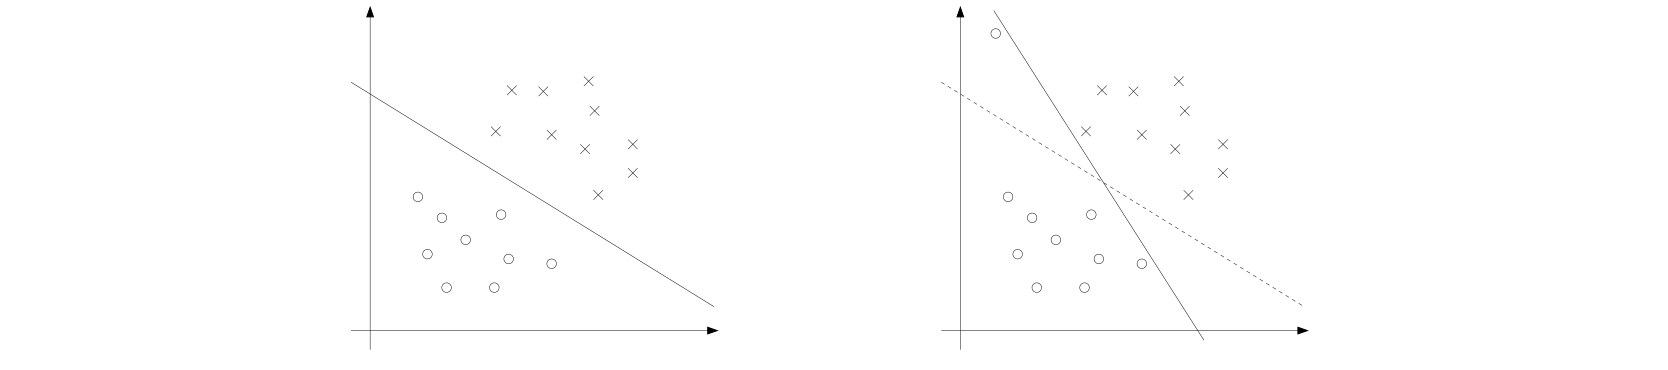

为了让算法对于线性不可分的数据起效，同时减少其对于噪声的敏感度，我们对于之前的原始优化问题进行了修正，引入了 **「L1 正则化」**：

$$\underset{\gamma,w,b}{\text{min}}\frac{1}{2}{\parallel w \parallel}^2+C\sum_{i=1}^m \xi_i\$$

$$\text{s.t.} \quad y^{(i)}(w^T x^{(i)}+b) \geq 1-\xi_i,i=1,2,...,m$$

$$\xi_i \geq 0,i=1,2,...m$$

上述公式引入了一个惩罚项，能够使得样本的函数距离小于 1（甚至小于0，即分类错误），但这样会导致目标函数变大，参数 $C$ 用于控制相对权重。

与之前同理，我们可以得出下面的拉格朗日方程：

$$\mathcal{L}(w,b,\xi,\alpha,r)=\frac{1}{2}w^T w+C\sum_{i=1}^m \xi_i-\sum_{i=1}^m \alpha_i[y^{(i)}(x^Tw+b)-1+\xi_i]-\sum_{i=1}^m r_i \xi_i$$

其中 $\alpha_i$ 与 $r_i$ 是拉格朗日乘子，省略推导过程，我们可以得到下面的对偶问题：

$$\underset{\alpha}{\text{max}} W(\alpha)=\sum_{i=1}^m \alpha_i-\frac{1}{2} \sum_{i,j=1}^m y^{(i)}y^{(j)}\alpha_i \alpha_j \langle x^{(i)},x^{(j)}\rangle$$

$$\text{s.t.} \quad 0 \leq \alpha \leq C,i=1,2,...,m$$

$$\sum_{i=1}^m \alpha_i y^{(i)}=0$$

可以看到，对偶问题唯一改变的地方就是 $\alpha_i$ 多了一个约束，我们仍然可以利用样本的内积进行预测，不过截距 $b$ 的计算公式会发生变化。

此外，KKT 对偶互补条件也会发生一些变化：

$$\alpha_i=0 \Rightarrow y^{(i)}(w^Tx^{(i)}+b)\geq 1 \tag{14}$$

$$\alpha_i=C \Rightarrow y^{(i)}(w^Tx^{(i)}+b)\leq 1 \tag{15}$$

$$0<\alpha_i<C \Rightarrow y^{(i)}(w^Tx^{(i)}+b)= 1 \tag{16}$$

这些条件将在下一节中用于判断 SMO 算法是否收敛。现在我们只需要一个能够实际求解对偶问题的算法，就可以实现支持向量机了！

### 9 SMO 算法

**「SMO(sequential minimal optimization)」算法**，为 SVM 推导中产生的对偶问题提供了一种高效解法。在讨论 SMO 算法之前，让我们先看一个与其思想相同的有趣算法：**「坐标上升(coordinate ascent)」** 法。

#### 9.1 坐标上升法(Coordinate ascent)

我们要解决如下的无约束优化问题：

$$\underset{\alpha}{\text{max}} W(\alpha_1,...,\alpha_m)$$

我们已经介绍了两种优化算法：梯度下降法和牛顿方法，下面要介绍一种新方法，称为 **「坐标上升法」**：

重复以下过程直至收敛：

* 对于 $i$ 从 1 到 $m$：
    
    $$\alpha_i:=\underset{\hat{\alpha_i}}{\text{argmax}} W(\alpha_1,...,\alpha_{i-1},\hat{\alpha_i},\alpha_{i+1},...,\alpha_m)$$
    
在内层循环中，当更新 $\alpha_i$ 时，保持其他的参数不变。在这个版本中，参数更新的顺序是按照下标的，其他更复杂的版本可能会根据 $W(\alpha)$ 的变化程度来决定参数的更新顺序。

当内层循环中的 $\text{argmax}$ 能够很快的求解时，此算法是一个相当高效的算法。下面是一张算法运行样例图：

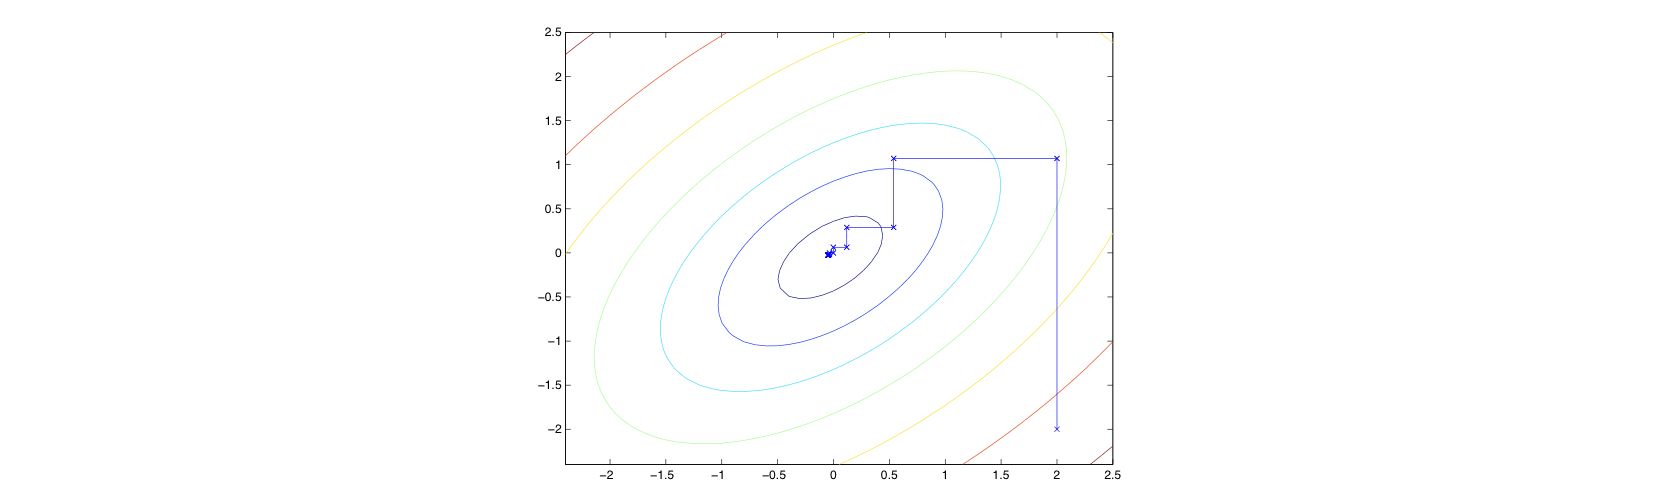

图中的椭圆是我们想要优化的二次函数的轮廓。坐标上升法从 $(2,-2)$ 这一点开始，可以看到每一步的优化路线都与坐标轴 **「平行」**，因为每次只优化一个变量。

#### 9.2 SMO

让我们用对 SMO 算法的推导为支持向量机的学习收尾。我们希望解决如下的对偶问题：

$$\underset{\alpha}{\text{max}} W(\alpha)=\sum_{i=1}^m \alpha_i-\frac{1}{2} \sum_{i,j=1}^m y^{(i)}y^{(j)}\alpha_i \alpha_j \langle x^{(i)},x^{(j)}\rangle\tag{17}$$

$$\text{s.t.} \quad 0 \leq \alpha \leq C,i=1,2,...,m\tag{18}$$

$$\sum_{i=1}^m \alpha_i y^{(i)}=0\tag{19}$$

如果我们使用坐标上升法来求解最优值，会发现由于约束 $(19)$ 的存在，会有：

$$\alpha_1 y^{(1)}=-\sum_{i=2}^m \alpha_i y^{(i)}$$

由于 $y^{(1)}\in \{1, -1 \}$，两边同乘 $y^{(1)}$， 得到：

$$\alpha_1=- y^{(1)}\sum_{i=2}^m \alpha_i y^{(i)}$$

因此，$\alpha_1$ 完全由其他的 $\alpha_i$ 决定，我们无法在不违背约束的情况下仅改变一个参数的值来求解优化问题。为了解决这个问题，我们可以一次更新两个参数，从而得到 SMO 算法：

重复以下过程直至收敛：

* 选择要更新的参数对 $\alpha_i$ 和 $\alpha_j$

* 保持其他参数不变，针对 $\alpha_i$ 和 $\alpha_j$ 来优化 $W(\alpha)$

我们可以使用一些启发式规则来选择使目标函数全局增长最大的参数对。为了测试算法是否收敛，我们可以检查 KKT 条件（方程 14-16）是否在某个 $tol$ 的范围内得到满足这里，$tol$ 是 **「收敛误差参数(convergence tolerance parameter)」**，通常被设置为大约 0.01 至 0.001。（具体细节请参考论文）

SMO 算法高效的关键原因是对于 $\alpha_i$ 和 $\alpha_j$ 的更新计算非常的高效，下面进行简单的阐述：

假设有一组参数 $\alpha_i$ 满足约束 $18-19$，我们希望去更新 $\alpha_1$ 和 $\alpha_2$ ，并保持其他参数不变，那么根据公式 $(19)$，我们有：

$$\alpha_1 y^{(1)}+\alpha_2 y^{(2)}=-\sum_{i=3}^m \alpha_i y^{(i)}=\zeta \tag{20}$$

$\zeta$ 为某个常数，我们可以得到如下的图像（假设 $y^{(1)}$ 和 $y^{(2)}$ 一正一负）：

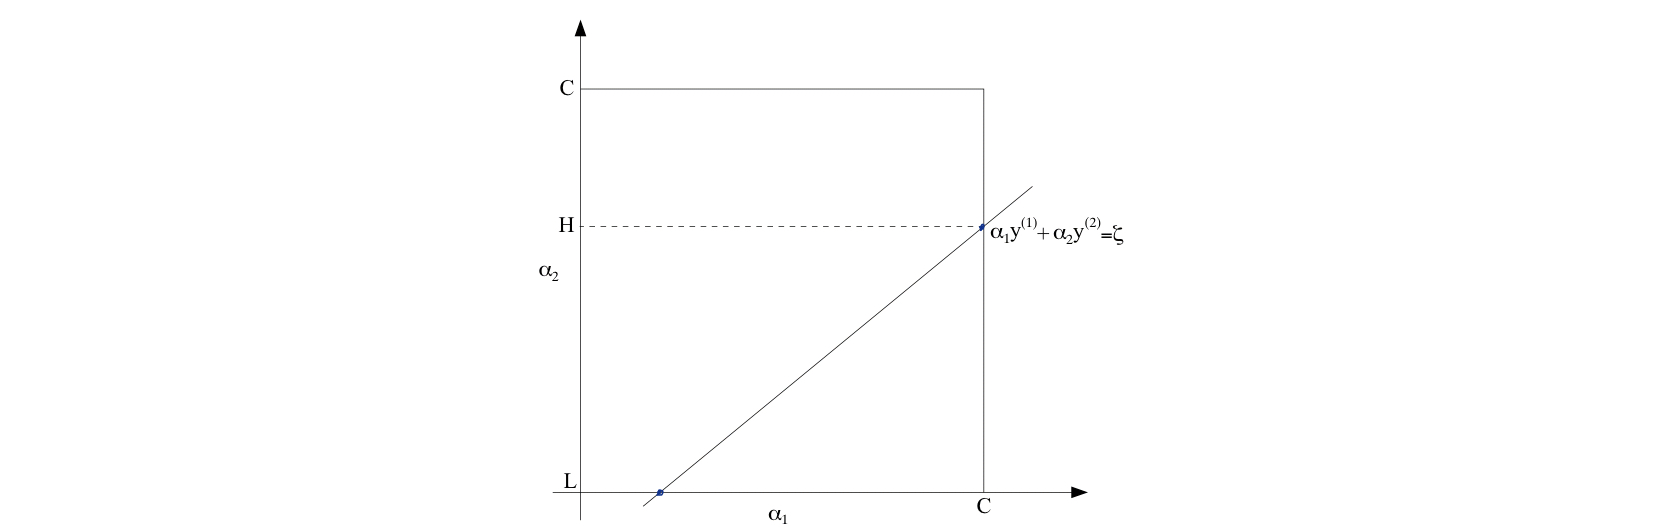

根据约束 $(18)$，我们知道 $\alpha_1$ 和 $\alpha_2$ 一定位于区间 $[0,C]\times[0,C]$ 内，从图中可以看出，$\alpha_2$ 一定存在某个上界 H 和某个下界 L ，来保证 $\alpha_1$ 和 $\alpha_2$ 位于区间 $[0,C]\times[0,C]$ 内，这个上界与下界取决于直线的位置。

使用公式 $(20)$，我们可以得到：

$$\alpha_1=(\zeta-\alpha_2 y^{(2)})y^{(1)}$$

因此，目标函数 $W(\alpha)$ 可以被写成：

$$W(\alpha_1,...,\alpha_m)=W((\zeta-\alpha_2y^{(2)})y^{(1)},\alpha_2,...,\alpha_m)$$

可以看到，将 $\alpha_3,...,\alpha_m$ 看作常数，那么目标函数就是一个标准的一元二次函数，可以改写成 $a\alpha_2^2+b\alpha_2+c$ 的形式。如果 $a<0$ ，那么假设导数为 0 时 $\alpha_2$ 为 $\alpha_2^{new,unclipped}$ ，那么根据边界条件 $[L,H]$ ，有如下几种情况：



总的来说，对于该函数的极值求解是很简单的，这样我们就可以高效地求解出对偶问题，从而求解 SVM 算法。

「以上就是 CS229 中关于支持向量机的全部阐述。」